In [21]:
import pandas as pd
import os
import plotly.express as px 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import squarify
import pygal 
import seaborn as sns 
import plotly.graph_objects as go
from itertools import repeat
import plotly
from matplotlib.ticker import FormatStrFormatter

In [22]:
pwd

'/Users/irawati'

In [23]:
mumdeeds= pd.read_csv('/Users/Irawati/Desktop/mum_deeds.csv')
mumdeeds['doc_name_eng'].fillna("Deed type unclear", inplace = True) #replace nas
mumdeeds

,doc_name_eng,district_eng,Count
0,1-Acknowledgement/Possession Receipt,Mumbai Suburban,57
1,1-Acknowledgement/Possession Receipt,Raigad,1
2,35-Compensation Bond,Mumbai,1090
3,35-Compensation Bond,Mumbai Suburban,2043
4,35-Compensation Bond,Palghar,30
...,...,...,...
534,Deed type unclear,Mumbai,36742
535,Deed type unclear,Mumbai Suburban,159160
536,Deed type unclear,Palghar,85659
537,Deed type unclear,Raigad,55442


In [24]:
#create new dataframe which displays only the rows of the relvant district
mumbai = mumdeeds[mumdeeds.district_eng == 'Mumbai']
#sort all dataframes in descending order
mumbai.sort_values(by=['Count'], inplace=True, ascending=False)
#create new dataframes with only top 10 deeds 
mumbai.drop(mumbai.tail(99).index,inplace=True)
#set first column as index for use as x axis
mumbai= mumbai.set_index('doc_name_eng')

#repeat exercise for all districts 
thane = mumdeeds[mumdeeds.district_eng == 'Thane']
thane.sort_values(by=['Count'], inplace=True, ascending=False)
thane.drop(thane.tail(99).index,inplace=True)
thane= thane.set_index('doc_name_eng')

mumbaisuburban = mumdeeds[mumdeeds.district_eng == 'Mumbai Suburban']
mumbaisuburban.sort_values(by=['Count'], inplace=True, ascending=False)
mumbaisuburban.drop(mumbaisuburban.tail(101).index,inplace=True)
mumbaisuburban= mumbaisuburban.set_index('doc_name_eng')

palghar = mumdeeds[mumdeeds.district_eng == 'Palghar']
palghar.sort_values(by=['Count'], inplace=True, ascending=False)
palghar.drop(palghar.tail(94).index,inplace=True)
palghar= palghar.set_index('doc_name_eng')

raigad = mumdeeds[mumdeeds.district_eng == 'Raigad']
raigad.sort_values(by=['Count'], inplace=True, ascending=False)
raigad.drop(raigad.tail(96).index,inplace=True)
raigad= raigad.set_index('doc_name_eng')

<ipython-input-24-0171c4c7ee02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai.sort_values(by=['Count'], inplace=True, ascending=False)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-24-0171c4c7ee02>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thane.sort_values(by=['Count'], inplace=True, ascending=False)
<ipython-inpu

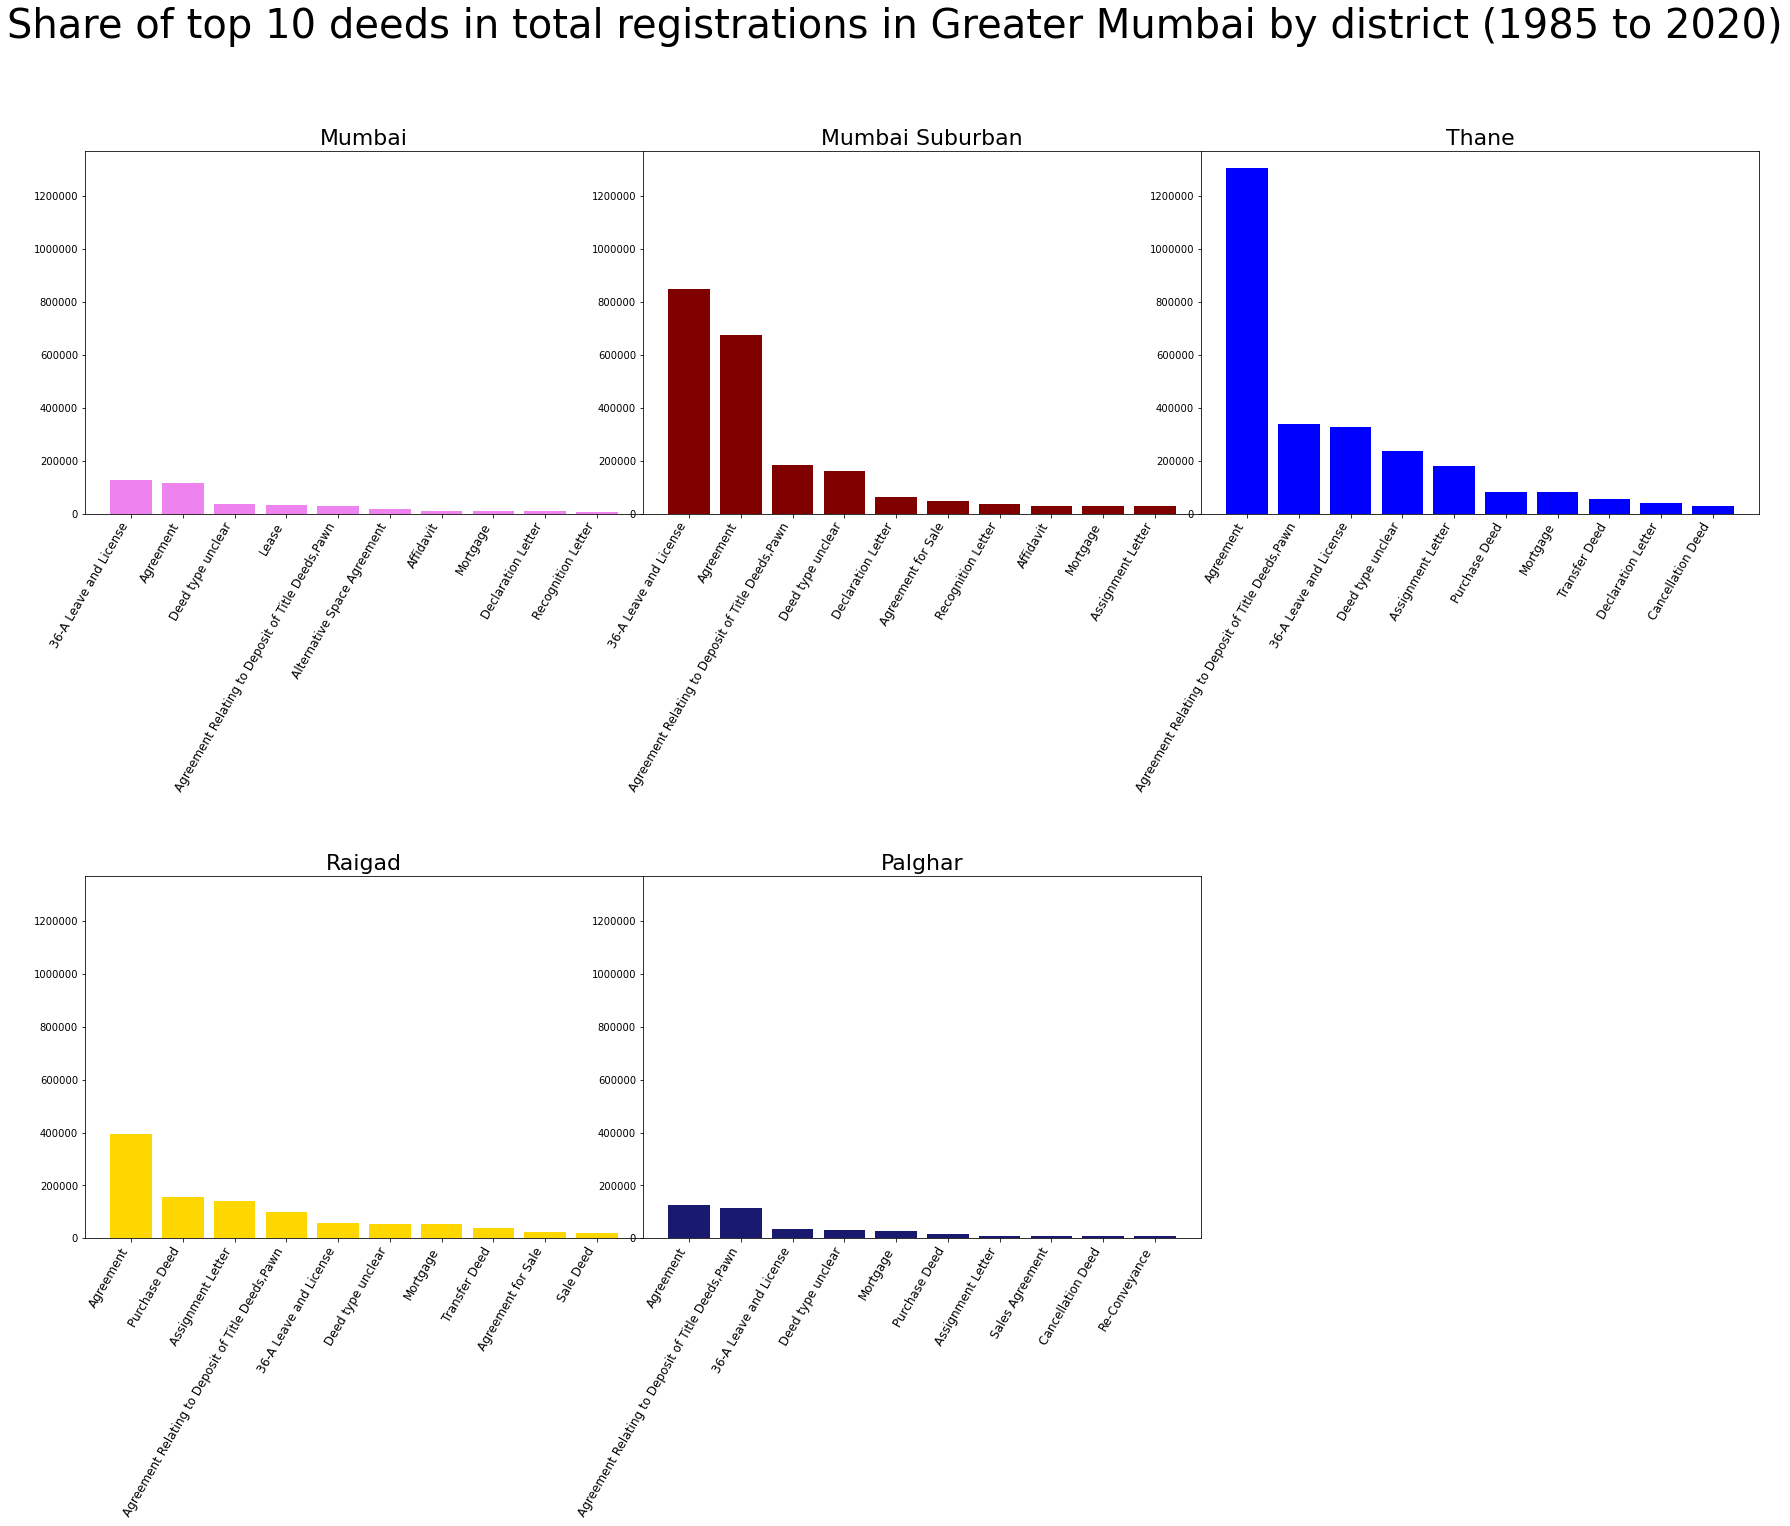

<Figure size 432x288 with 0 Axes>

In [25]:
#create canvas using matplotlib, give entire canvas a size
fig= plt.figure(figsize=(30,20))
fig.suptitle('Share of top 10 deeds in total registrations in Greater Mumbai by district (1985 to 2020)', fontsize=40)

#create grid which is 2 by 3 to fit the 5 subplots
Mumbai=fig.add_subplot(2,3,1)

#sharey=Mumbai gives the same scale to all bar plots
MumbaiSuburban=fig.add_subplot(2,3,2, sharey=Mumbai)
Thane=fig.add_subplot(2,3,3, sharey=Mumbai)
Raigad=fig.add_subplot(2,3,4, sharey=Mumbai)
Palghar= fig.add_subplot(2,3,5, sharey=Mumbai)

#plot bar graphs
Mumbai.bar(mumbai.index, mumbai['Count'], color='violet')
Mumbai.set_xticklabels(mumbai.index, rotation=60, horizontalalignment='right', fontsize=12)
Mumbai.set_title('Mumbai', fontsize=22)

MumbaiSuburban.bar(mumbaisuburban.index, mumbaisuburban['Count'], color='maroon')
MumbaiSuburban.set_xticklabels(mumbaisuburban.index, rotation=60, horizontalalignment='right', fontsize=12)
MumbaiSuburban.set_title('Mumbai Suburban', fontsize=22)

Thane.bar(thane.index, thane['Count'], color='blue')
Thane.set_xticklabels(thane.index, rotation=60, horizontalalignment='right', fontsize=12)
Thane.set_title('Thane', fontsize=22)

Raigad.bar(raigad.index, raigad['Count'], color='gold')
Raigad.set_xticklabels(raigad.index, rotation=60, horizontalalignment='right', fontsize=12)
Raigad.set_title('Raigad', fontsize=22)

Palghar.bar(palghar.index, mumbai['Count'], color='midnightblue')
Palghar.set_xticklabels(palghar.index, rotation=60, horizontalalignment='right', fontsize=12)
Palghar.set_title('Palghar', fontsize=22)

#adjust white space between subplots and format scale to read actual number of deeds
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=1)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()

#save the figure
plt.savefig ('Share of Top Ten Deeds in Greater Mumbai Districts_Multiple Barplots.png', bbox_inches='tight')